In [99]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import dates


In [100]:
df = pd.read_csv("data.csv", delimiter = ",", decimal = ",")
df

,Start,End,Registration,Amount,Amount Refunded,Days,Hours,Kilometers,Unnamed: 8,Unnamed: 9,Monthly fee,Large,Unnamed: 12,Monthly fee.1,Lagom,Unnamed: 15,Monthly fee.2,Premium
0,2022-09-30 8:45,2022-09-30 12:00,ESP27B,320.26,0.0,0,3,22,NaN,NaN,895.0,0.0,NaN,195.0,195.0,NaN,395.0,0.0
1,2022-04-06 8:30,2022-04-06 16:00,ESP27B,617.50,0.0,0,7,40,NaN,NaN,895.0,0.0,NaN,195.0,0.0,NaN,NaN,NaN
2,2022-03-27 13:00,2022-03-27 17:15,FCE68C,559.51,0.0,0,4,106,NaN,NaN,895.0,0.0,NaN,195.0,0.0,NaN,NaN,NaN
3,2022-03-20 17:30,2022-03-20 22:00,MGD320,305.00,0.0,0,4,20,NaN,NaN,895.0,0.0,NaN,195.0,0.0,NaN,NaN,NaN
4,2022-03-20 9:00,2022-03-20 12:30,YTH92B,379.91,0.0,0,3,49,NaN,NaN,895.0,0.0,NaN,195.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2020-04-10 16:00,2020-04-10 18:00,KRL89A,577.00,0.0,0,2,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,2020-04-10 11:00,2020-04-10 17:00,BEM53G,155.00,0.0,0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,2020-04-09 15:30,2020-04-09 17:30,OKX24B,176.54,0.0,0,2,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,2020-04-04 15:45,2020-04-04 17:30,PRK994,160.38,0.0,0,1,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df.dtypes

Start               object
End                 object
Registration        object
Amount             float64
Amount Refunded    float64
Days                 int64
Hours                int64
Kilometers           int64
Unnamed: 8         float64
Unnamed: 9         float64
Monthly fee        float64
Large              float64
Unnamed: 12        float64
Monthly fee.1      float64
Lagom              float64
Unnamed: 15        float64
Monthly fee.2      float64
Premium            float64
dtype: object

In [102]:
df["Start"] = pd.to_datetime(df["Start"])
df["Start"] = df.Start.dt.strftime("%Y-%m-%d")
df["End"] = pd.to_datetime(df["End"])
df.dtypes

Start                      object
End                datetime64[ns]
Registration               object
Amount                    float64
Amount Refunded           float64
Days                        int64
Hours                       int64
Kilometers                  int64
Unnamed: 8                float64
Unnamed: 9                float64
Monthly fee               float64
Large                     float64
Unnamed: 12               float64
Monthly fee.1             float64
Lagom                     float64
Unnamed: 15               float64
Monthly fee.2             float64
Premium                   float64
dtype: object

In [103]:
df["startYear"] = df.Start.dt.year
df["startMonth"] = df.Start.dt.month
df["endMYear"] = df.End.dt.year
df["endMonth"] = df.End.dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df["HoursTotal"] = df.Days * 24 + df.Hours

In [ ]:
def plot_dates(df):
    ax = df.plot(kind = "bar", figsize = (25, 10))

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    ax.grid(axis = "y", linestyle = "--", linewidth = 0.5)
    
    ax.tick_params(
        axis="y",  
        length = 0
    ) 
    ax.tick_params(
        axis="x",  
        length = 5
    ) 
    
    plt.show()

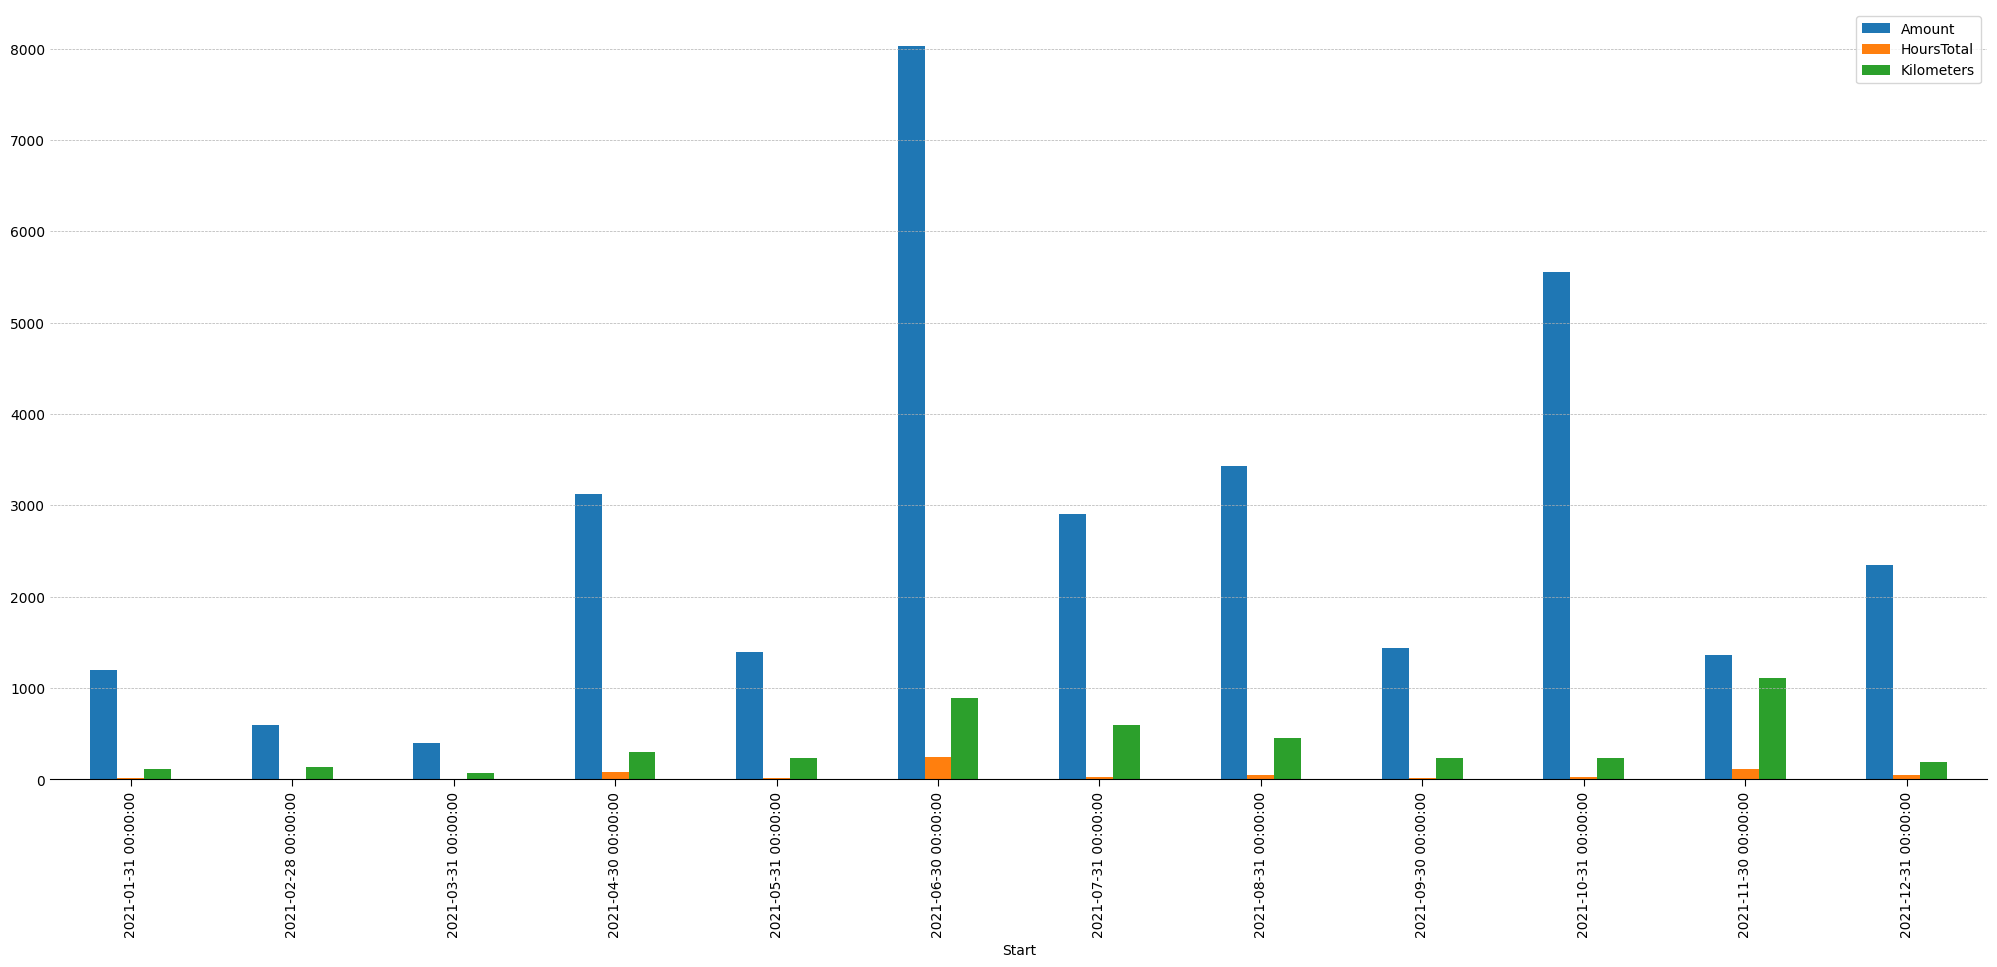

,Amount,HoursTotal,Kilometers
Start,,,
2021-12-31,31755.61,663,4569


In [ ]:
plot_dates(df[df.startYear == 2021].set_index("Start").groupby([pd.Grouper(freq = "M")]).agg({"Amount": "sum", "HoursTotal": "sum", "Kilometers": "sum"}))
df[df.startYear == 2021].set_index("Start").groupby([pd.Grouper(freq = "Y")]).agg({"Amount": "sum", "HoursTotal": "sum", "Kilometers": "sum"})